# Introduction

In this project, you will build a neural network of your own design to evaluate the MNIST dataset.

Some of the benchmark results on MNIST include can be found [on Yann LeCun's page](http://yann.lecun.com/exdb/mnist/) and include:

88% [Lecun et al., 1998](http://yann.lecun.com/exdb/publis/pdf/lecun-98.pdf)
95.3% [Lecun et al., 1998](http://yann.lecun.com/exdb/publis/pdf/lecun-98.pdf)
99.65% [Ciresan et al., 2011](http://people.idsia.ch/~juergen/ijcai2011.pdf)

MNIST is a great dataset for sanity checking your models, since the accuracy levels achieved by large convolutional neural networks and small linear models are both quite high. This makes it important to be familiar with the data.

## Imports

In [2]:
## This cell contains the essential imports you will need – DO NOT CHANGE THE CONTENTS! ##
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np
from torchvision import datasets, transforms

In [3]:
pip install ipywidgets==7.4.2

Defaulting to user installation because normal site-packages is not writeable
     |████████████████████████████████| 111 kB 5.8 MB/s eta 0:00:01
     |████████████████████████████████| 2.2 MB 24.4 MB/s eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


## Load the Dataset

Specify your transforms as a list if you intend to .
The transforms module is already loaded as `transforms`.

MNIST is fortunately included in the torchvision module.
Then, you can create your dataset using the `MNIST` object from `torchvision.datasets` ([the documentation is available here](https://pytorch.org/vision/stable/datasets.html#mnist)).
Make sure to specify `download=True`! 

Once your dataset is created, you'll also need to define a `DataLoader` from the `torch.utils.data` module for both the train and the test set.

In [4]:
# Define transforms
## YOUR CODE HERE ##
transform=transforms.Compose([transforms.ToTensor()])

# Create training set and define training dataloader
## YOUR CODE HERE ##
train_data=torchvision.datasets.MNIST(root="data",train=True,download=True,transform=transform)

valid_data=torchvision.datasets.MNIST(root="data",train=False,download=True,transform=transform)
# Create test set and define test dataloader
## YOUR CODE HERE ##
test_data=torchvision.datasets.MNIST(root="data",train=False,download=True,transform=transform)

/opt/conda/lib/python3.7/site-packages/torchvision/datasets/mnist.py:498: UserWarning: The given NumPy array is not writable, and PyTorch does not support non-writable tensors. This means writing to this tensor will result in undefined behavior. You may want to copy the array to protect its data or make it writable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  ../torch/csrc/utils/tensor_numpy.cpp:178.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


In [5]:
trainloader=torch.utils.data.DataLoader(train_data,batch_size=16,shuffle=True)
validloader=torch.utils.data.DataLoader(valid_data,batch_size=16,shuffle=True)
testloader=torch.utils.data.DataLoader(test_data,batch_size=16)

## Justify your preprocessing

In your own words, why did you choose the transforms you chose? If you didn't use any preprocessing steps, why not?

All the images in the MNIST dataset have a size of 28x28 pixels. Therefore, there is no need for resizing or reshaping the images before feeding them into the neural network.

## Explore the Dataset
Using matplotlib, numpy, and torch, explore the dimensions of your data.

You can view images using the `show5` function defined below – it takes a data loader as an argument.
Remember that normalized images will look really weird to you! You may want to try changing your transforms to view images.
Typically using no transforms other than `toTensor()` works well for viewing – but not as well for training your network.
If `show5` doesn't work, go back and check your code for creating your data loaders and your training/test sets.

In [6]:
train_size = len(train_data)
print(train_size)
test_size  = len(test_data)
print(test_size)
train_shape = train_data.data[0].shape
print(train_shape)
test_shape =  test_data.data[0].shape
print(test_shape)

60000
10000
torch.Size([28, 28])
torch.Size([28, 28])


In [7]:
## This cell contains a function for showing 5 images from a dataloader – DO NOT CHANGE THE CONTENTS! ##
def show5(img_loader):
    dataiter = iter(img_loader)
    
    batch = next(dataiter)
    labels = batch[1][0:5]
    images = batch[0][0:5]
    for i in range(5):
        print(int(labels[i].detach()))
    
        image = images[i].numpy()
        plt.imshow(image.T.squeeze().T)
        plt.show()

5


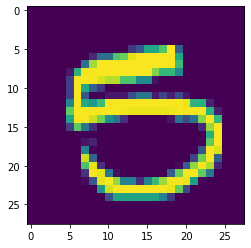

8


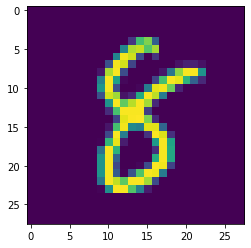

8


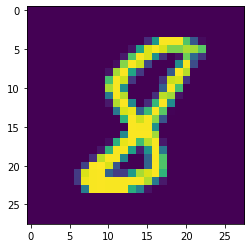

3


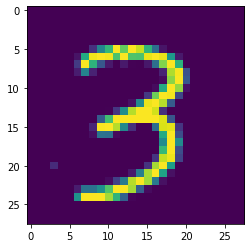

9


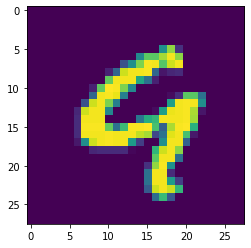

In [8]:
show5(trainloader)

## Build your Neural Network
Using the layers in `torch.nn` (which has been imported as `nn`) and the `torch.nn.functional` module (imported as `F`), construct a neural network based on the parameters of the dataset.
Use any architecture you like. 

*Note*: If you did not flatten your tensors in your transforms or as part of your preprocessing and you are using only `Linear` layers, make sure to use the `Flatten` layer in your network!

In [9]:
## YOUR CODE HERE ##
hidden_layer_1=128
class NET(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(784,hidden_layer_1)
        self.fc2 = nn.Linear(hidden_layer_1, 10)

    def forward(self, x):
        x = x.view(-1, 784)
        x = self.fc1(x)
        x = nn.ReLU()(x)
        x = self.fc2(x)
        return x
    
net=NET()

In [10]:
## YOUR CODE HERE ##
lr=0.01
optimizer=optim.Adam(net.parameters(),lr=lr)
criterion=nn.CrossEntropyLoss()

Specify a loss function and an optimizer, and instantiate the model.

If you use a less common loss function, please note why you chose that loss function in a comment.

In [11]:
## YOUR CODE HERE ##

## Running your Neural Network
Use whatever method you like to train your neural network, and ensure you record the average loss at each epoch. 
Don't forget to use `torch.device()` and the `.to()` method for both your model and your data if you are using GPU!

If you want to print your loss **during** each epoch, you can use the `enumerate` function and print the loss after a set number of batches. 250 batches works well for most people!

In [12]:
## YOUR CODE HERE ##
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
net.to(device)

NET(
  (fc1): Linear(in_features=784, out_features=128, bias=True)
  (fc2): Linear(in_features=128, out_features=10, bias=True)
)

Plot the training loss (and validation loss/accuracy, if recorded).

In [13]:
epochs = 3
train_losses = []
valid_losses = []

for epoch in range(epochs):
    net.train()
    train_loss = 0

    for idx, (images, labels) in enumerate(trainloader): 
        images = images.to(device)
        labels = labels.to(device)
        optimizer.zero_grad()
        output = net(images)
        loss = criterion(output, labels)
        loss.backward()
        optimizer.step()
        train_loss += loss.item()
        
    
    net.eval()
    valid_loss = 0
    validaccuracy = 0
    with torch.no_grad():
        for images, labels in validloader:     
            images = images.to(device)
            labels = labels.to(device)   
            outputs1 = net(images)
            valid_loss += criterion(outputs1, labels)
            probabilities = torch.exp(outputs1)
            top_prob, top_class = probabilities.topk(1, dim=1)
            predictions = top_class == labels.view(*top_class.shape)
            validaccuracy += torch.mean(predictions.type(torch.FloatTensor))
        
    train_losses.append(train_loss/len(trainloader))
    valid_losses.append(valid_loss/len(validloader))
        
    print("Epoch: {}/{}  ".format(epoch+1, epochs),
          "Training loss: {:.4f}  ".format(train_loss/len(trainloader)),
          "validation loss: {:.4f}  ".format(valid_loss/len(validloader)),
          "valid accuracy: {:.4f}  ".format(validaccuracy/len(validloader)))

Epoch: 1/3   Training loss: 0.2771   validation loss: 0.2011   valid accuracy: 0.9460  
Epoch: 2/3   Training loss: 0.2002   validation loss: 0.2173   valid accuracy: 0.9474  
Epoch: 3/3   Training loss: 0.1881   validation loss: 0.1907   valid accuracy: 0.9521  


## Testing your model
Using the previously created `DataLoader` for the test set, compute the percentage of correct predictions using the highest probability prediction. 

If your accuracy is over 90%, great work, but see if you can push a bit further! 
If your accuracy is under 90%, you'll need to make improvements.
Go back and check your model architecture, loss function, and optimizer to make sure they're appropriate for an image classification task.

In [14]:
## YOUR CODE HERE ##
test_accuracy=0
with torch.no_grad():
    for test_images,test_labels in testloader:
        net.eval()
        test_images=test_images.to(device)
        test_labels=test_labels.to(device)
   
        test_outputs=net.forward(test_images)
        test_loss=criterion(test_outputs,test_labels)
        ps=torch.exp(test_outputs)
        top_p,top_class=ps.topk(1,dim=1)
        equals=top_class==test_labels.view(*top_class.shape)
        test_accuracy+=torch.mean(equals.type(torch.FloatTensor))
    
    
    print("test accuracy:{:.2f} %".format(test_accuracy/len(testloader)*100))

test accuracy:95.21 %


## Improving your model

Once your model is done training, try tweaking your hyperparameters and training again below to improve your accuracy on the test set!

In [15]:
hidden_layer_1=512
hidden_layer_2=64
class NET(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(in_channels=1, out_channels=12, kernel_size=3, padding=1, stride=1)
        self.conv2 = nn.Conv2d(in_channels=12, out_channels=24, kernel_size=3, padding=1, stride=1)
        self.fc1 = nn.Linear(24*7*7, hidden_layer_1)
        self.fc2 = nn.Linear(hidden_layer_1, hidden_layer_2)
        self.fc3 = nn.Linear(hidden_layer_2, 10)

    def forward(self, x):
        x = self.conv1(x)
        x = nn.ReLU()(x)
        x = nn.MaxPool2d(kernel_size=2)(x)
        x = self.conv2(x)
        x = nn.ReLU()(x)
        x = nn.MaxPool2d(kernel_size=2)(x)
        x = x.view(x.size(0), -1)
        x = self.fc1(x)
        x = nn.ReLU()(x)
        x = self.fc2(x)
        x = nn.ReLU()(x)
        x = self.fc3(x)
        return x
net=NET()

In [16]:
lr=0.001
optimizer=optim.SGD(net.parameters(),lr=lr)
criterion=nn.CrossEntropyLoss()

In [17]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
net.to(device)

NET(
  (conv1): Conv2d(1, 12, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv2): Conv2d(12, 24, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (fc1): Linear(in_features=1176, out_features=512, bias=True)
  (fc2): Linear(in_features=512, out_features=64, bias=True)
  (fc3): Linear(in_features=64, out_features=10, bias=True)
)

In [19]:
epochs = 15
train_losses = []
valid_losses = []

for epoch in range(epochs):
    net.train()
    train_loss = 0

    for idx, (images, labels) in enumerate(trainloader): 
        images = images.to(device)
        labels = labels.to(device)
        optimizer.zero_grad()
        output = net(images)
        loss = criterion(output, labels)
        loss.backward()
        optimizer.step()
        train_loss += loss.item()
        
    
    net.eval()
    valid_loss = 0
    validaccuracy = 0
    with torch.no_grad():
        for images, labels in validloader:     
            images = images.to(device)
            labels = labels.to(device)   
            outputs1 = net(images)
            valid_loss += criterion(outputs1, labels)
            probabilities = torch.exp(outputs1)
            top_prob, top_class = probabilities.topk(1, dim=1)
            predictions = top_class == labels.view(*top_class.shape)
            validaccuracy += torch.mean(predictions.type(torch.FloatTensor))
        
    train_losses.append(train_loss/len(trainloader))
    valid_losses.append(valid_loss/len(validloader))
        
    print("Epoch: {}/{}  ".format(epoch+1, epochs),
          "Training loss: {:.4f}  ".format(train_loss/len(trainloader)),
          "validation loss: {:.4f}  ".format(valid_loss/len(validloader)),
          "valid accuracy: {:.4f}  ".format(validaccuracy/len(validloader)))

Epoch: 1/15   Training loss: 0.3110   validation loss: 0.2772   valid accuracy: 0.9172  
Epoch: 2/15   Training loss: 0.2663   validation loss: 0.2309   valid accuracy: 0.9293  
Epoch: 3/15   Training loss: 0.2306   validation loss: 0.1974   valid accuracy: 0.9405  
Epoch: 4/15   Training loss: 0.2009   validation loss: 0.1688   valid accuracy: 0.9479  
Epoch: 5/15   Training loss: 0.1774   validation loss: 0.1488   valid accuracy: 0.9548  
Epoch: 6/15   Training loss: 0.1582   validation loss: 0.1381   valid accuracy: 0.9569  
Epoch: 7/15   Training loss: 0.1430   validation loss: 0.1187   valid accuracy: 0.9631  
Epoch: 8/15   Training loss: 0.1296   validation loss: 0.1144   valid accuracy: 0.9660  
Epoch: 9/15   Training loss: 0.1189   validation loss: 0.1088   valid accuracy: 0.9662  
Epoch: 10/15   Training loss: 0.1097   validation loss: 0.0953   valid accuracy: 0.9699  
Epoch: 11/15   Training loss: 0.1023   validation loss: 0.0901   valid accuracy: 0.9712  
Epoch: 12/15   Trai

In [ ]:
## YOUR CODE HERE ##
test_accuracy=0
with torch.no_grad():
    for test_images,test_labels in testloader:
        net.eval()
        test_images=test_images.to(device)
        test_labels=test_labels.to(device)
   
        test_outputs=net.forward(test_images)
        test_loss=criterion(test_outputs,test_labels)
        ps=torch.exp(test_outputs)
        top_p,top_class=ps.topk(1,dim=1)
        equals=top_class==test_labels.view(*top_class.shape)
        test_accuracy+=torch.mean(equals.type(torch.FloatTensor))
    
    
    print("test accuracy:{:.2f} %".format(test_accuracy/len(testloader)*100))

## Saving your model
Using `torch.save`, save your model for future loading.

In [ ]:
## YOUR CODE HERE ##
net.class_to_idx=train_data.class_to_idx
torch.save({"hidden_layer1":512,
            "hidden_layer2":64,
            "output_layer":10,
            "gpu":device,
            "lr":0.001,
            "epochs":15,
            "state_dict":net.state_dict(),
            "class_to_idx":net.class_to_idx,
            "optimizer_dict":optimizer.state_dict()},
            "checkpoint.pth")